In [1]:
import pandas as pd
import numpy as np
train=pd.read_csv("Train.csv")

In [2]:
test=pd.read_csv("Test.csv")

In [3]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [4]:

y_train=np.array(train.target)
y_test=np.array(test.target)


In [5]:
train=np.array(train)
test=np.array(test)
x_train=np.array(train[:,:5])
x_test=np.array(test[:,:5])
ones = np.ones((x_train.shape[0],1))
x_train = np.hstack((x_train,ones))
ones = np.ones((x_test.shape[0],1))
x_test = np.hstack((x_test,ones))

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[29.68187118 92.66247759  8.28062089 44.76773522  2.51916121  0.        ]
4.990966735574961


In [8]:
print("training score is %0.4f"%lr.score(x_train,y_train))
print("training score is %0.4f"%lr.score(x_test,y_test))

training score is 0.9661
training score is 0.9691


# 1 features
it is 5

In [9]:
## 2.gradient descent 

In [10]:
import numpy as np

In [11]:
def needed_x(x_train,i):
    X=(x_train[i,:])
    X.reshape((-1,1))
    return(X)


In [12]:
y_train=np.array(y_train)
x_train=np.array(x_train)

In [13]:
def hypothesis(theta,x_train,i):
    X=needed_x(x_train,i) 
    theta=np.transpose(theta)
    return(np.dot(theta,X))
        
        

In [14]:
def gradient(theta,y_train,x_train,j,indices):
    grad=0.0
    for i in indices:
        grad+=(hypothesis(theta,x_train,i)-y_train[i])*x_train[i][j]
    return(grad)
    
    

In [15]:
def error(theta,x_train,y_train):
    loss=0
    m=x_train.shape[0]
    for i in range(m):
        hyp=hypothesis(theta,x_train,i)
        loss+=(hyp-y_train[i])**2
    return(loss*0.5)

In [16]:
t=np.ones((6,))
print(error(t,x_train,y_train))




9529710.852105778


In [17]:
def gradientdescent(x_train,y_train,learning_rate=0.001,batch_size=1):
    theta=np.zeros((6,))
    m=x_train.shape[0]
    err=[]
    indices=np.arange(m)
    temp=error(theta,x_train,y_train)
    error_change=temp
    while(error_change>0.001): 
        indices=np.arange(m)
        np.random.shuffle(indices)
        indices=indices[:batch_size]
        for j in range(6):
            grad=gradient(theta,y_train,x_train,j,indices)
            theta[j]=theta[j]-learning_rate*grad
        error_change=temp-error(theta,x_train,y_train)
        temp=error(theta,x_train,y_train)
        err.append(temp)
    return theta,err
    

## for stochastic 

In [18]:
final_theta,errf=gradientdescent(x_train,y_train)
print(final_theta)

[-0.12844479  1.90464775  0.27626115  0.12048878  0.10522396 -0.2979287 ]


In [19]:
import matplotlib.pyplot as plt
m=x_train.shape[0]

## GD

In [20]:

ftheta,err=gradientdescent(x_train,y_train,batch_size=m)
print(ftheta)

[29.68224325 92.6628862   8.28062904 44.76753338  2.51917643  4.99111317]


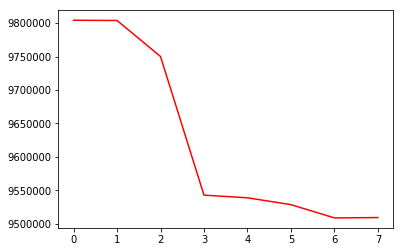

In [21]:
plt.plot(errf,color='red')

plt.show()

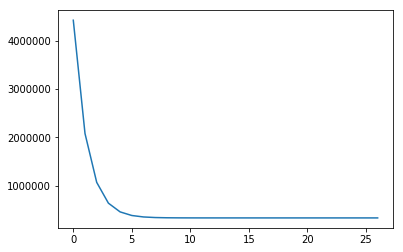

In [22]:
plt.plot(err)

plt.show()

In [24]:
def coeffofdet(x_train,y_train,ftheta):
    m=x_train.shape[0]
    upp=0
    low=0
    for i in range(m):
        upp+=(y_train[i]-hypothesis(ftheta,x_train,i))**2
        low+=(y_train[i]-y_train.mean())**2
    coeff=1-(upp/low)
    return coeff 

In [25]:
print(coeffofdet(x_train,y_train,final_theta))

0.03014010596106298
